  # Age generation

## 1. Load age data
Source: https://bestat.statbel.fgov.be/bestat/crosstable.xhtml?view=4e056039-dc63-4942-9dfb-de3d503da9c0

In [1]:
data <- read.csv("../datasets/repartition_age.csv", header=TRUE)
age <- data$Age
population <- data$Pop
population_prob <- population / sum(population)

## 2. Get density function

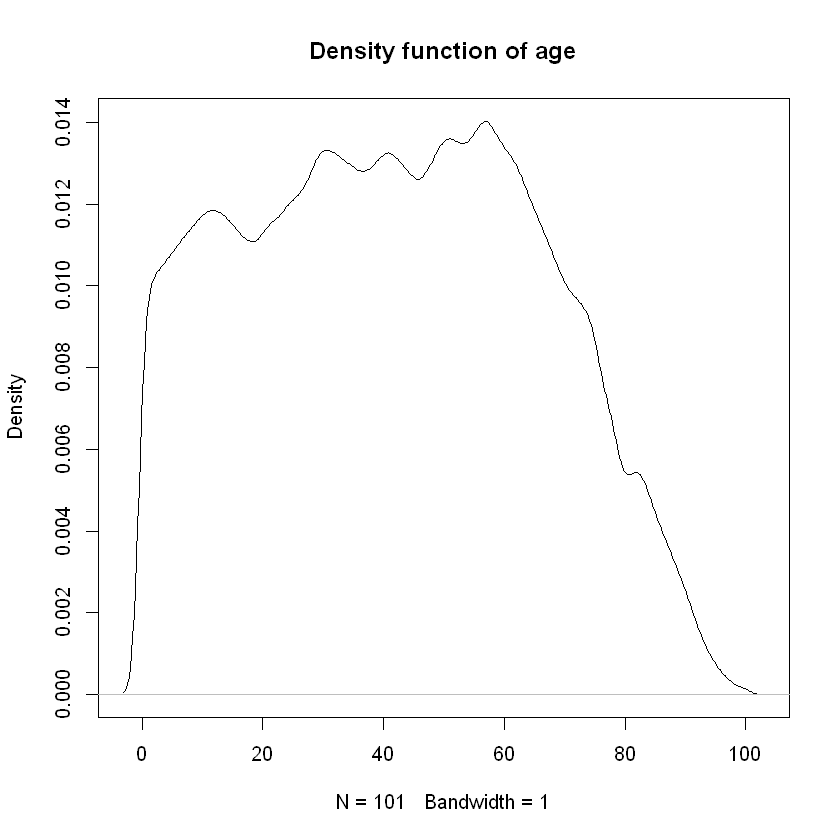

In [2]:
age_density <- density(data$Age, weights=population_prob, bw=1)
plot(age_density, main = "Density function of age")

## 3. Generate new data based on density function
Source: https://stackoverflow.com/questions/32871602/r-generate-data-from-a-probability-density-distribution

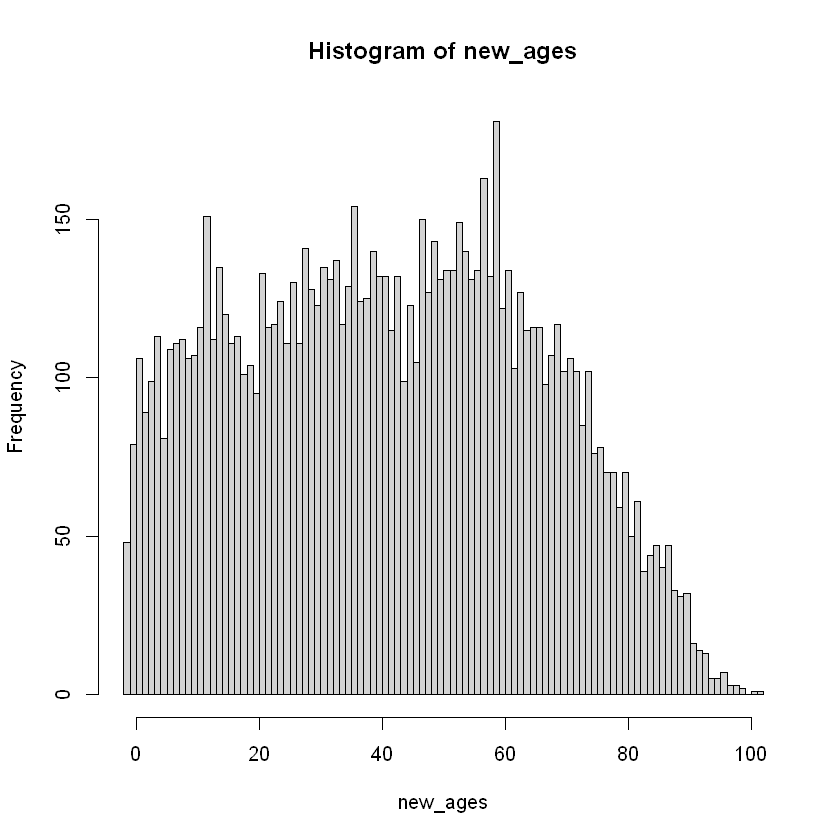

In [4]:
gen_count <- 10000

new_ages <- approx(
  cumsum(age_density$y)/sum(age_density$y),
  age_density$x,
  runif(gen_count)
)$y

# Round the ages
new_ages <- round(new_ages)

hist(new_ages, 100)

## 4. Export data

In [5]:
new_ages <- subset(new_ages, new_ages >= 18 & new_ages <= 100)
new_ages <- data.frame(age = new_ages)
write.csv(new_ages, file = "../workingsets/temp_age.csv")